# Symbolic computation

## Q1
Write Python code that uses `sympy` for symbolic variables to find the solutions to the following quadratic equation
$$ax^2 + bx + c = 0$$

In [0]:
import sympy as sym 

a, b, c, x = sym.symbols('a b c x')

sym.solve(a*x**2 + b*x + c, x) # This means, solve the function = 0, with respect to x

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

In [0]:
from sympy import solve, symbols # By explicitly naming the parts you want to 
                                 # import, the code becomes more efficient as it
                                 # imports less code

a, b, c, x = symbols('a b c x')
solve(a*x**2 + b*x + c, x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

## Q2

1. Solve $\frac{G m_1 m_2}{r^2}-F = 0$ with respect to $r$.
2. Substitute the following values into the two solutions you found for the quadratic equation above:
  - $G = 6.67408e-11$, 
  - $m_1 = 1e12$, 
  - $m_2 = 2e8$, and 
  - $F = 1e5$

In [0]:
from sympy import solve, symbols

G, m1, m2, r, F = symbols('G m1 m2 r F')
y = solve(G*m1*m2/r**2 - F, r)

print("A solution: {}".format(y[0]))
print("A solution: {}".format(y[1]))

# Now we substitute our values into the symbolic equation
values = [(G, 6.67408e-11), (m1, 1e12), (m2, 2e8), (F, 1e5)]

solution1 = y[0].subs(values)
solution2 = y[1].subs(values)
print('Solution 1:', solution1)
print('Solution 2:', solution2)

A solution: -sqrt(G*m1*m2/F)
A solution: sqrt(G*m1*m2/F)
Solution 1: -365.351337755865
Solution 2: 365.351337755865


## Q3
The equation of a circle of radius $r$ is given by $$ y=\sqrt{r^2 - x^2} $$ where $x$ and $y$ are coordinates. 

- Write symbolic python code to find the equation of the tangent that cuts the y-axis at $y = 2r$. 
- Hence find the point at which the tangent cuts the x-axis.

In [1]:
from sympy import symbols, solve, sqrt, diff

x, y, r, c = symbols('x y r c')
y = sqrt(r**2 - x**2)
m = diff(y, x, 1)
c = 2*r
yt = m*x + c # equation of the tangent that cuts the y axis at 2*r

print('The equation of the tangent is y = {}'.format(yt))

sx = solve(yt, x) # Find the values of x at which, yt = 0

print('The first point of x axis intersection:', sx[0].evalf())
print('The second point of x axis intersection:', sx[1].evalf())

The equation of the tangent is y = 2*r - x**2/sqrt(r**2 - x**2)
The first point of x axis intersection: -0.910179721124455*r
The second point of x axis intersection: 0.910179721124455*r


# Q4
Write Python code using symbolic math to find the solutions for the function 
$$f=x^3-12x^2+44x-48=0$$ 

Solutions of the functions are those x values at which the function value is 0. 

Then extend the code to substitute the solutions into the function to test whether the function value becomes 0 at the solutions.

In [3]:
from sympy import solve,symbols

x, f = symbols('x f')

f = x**3 - 12*x**2 + 44*x - 48
solutions = solve(f, x)

N = len(solutions) # number of solutions
print("There are {} solutions".format(N))


# the enumerate function gives us the position in the list, and the list item 
# as we iterate through it
for n, solution in enumerate(solutions): 
    value_sets = [(x, solution)]
    f_num = f.subs(value_sets)
    print("The value of the function at solution {} is {}".format(n+1, f_num))

There are 3 solutions
The value of the function at solution 1 is 0
The value of the function at solution 2 is 0
The value of the function at solution 3 is 0


# Q5
Use Python symbolic math to simplify the equation given by 
$$g= \frac{(x^2+2xz+x)}{x}$$ 

Hence find the value of $g$ when $x = 1$ and $z = 2$. 

Display the answer using a print command.

In [5]:
from sympy import symbols, simplify

x, z, g = symbols('x z g')
g = (x**2 + 2*x*z + x)/x

gs = simplify(g)
print("g, when simplified is", gs)

value = gs.subs([(x,1),(z,2)])
print('The value of the function at x = 1, z = 2:', value)

g, when simplified is x + 2*z + 1
The value of the function at x = 1, z = 2: 6


# Q6
1. Write Python code using symbolic math to get the differentiated function $\frac{𝑑𝑓}{dx}$ of the function 
$$𝑓 = 𝑥^3 − 12𝑥^2 + 44𝑥 − 48$$ 
with respect to $x$. 

2. Find the solutions for the differentiated function $\frac{𝑑𝑓}{dx} = 0$  with respect to $x$. 

3. Plot the function 𝑓 for x from 1 to 6 sampled in steps of 0.1. Comment on what the solutions for the differentiated function $\frac{𝑑𝑓}{dx} = 0$  mean with respect to the above plot.

df/dx = 3*x**2 - 24*x + 44
Solutions for df are: [-2*sqrt(3)/3 + 4, 2*sqrt(3)/3 + 4]


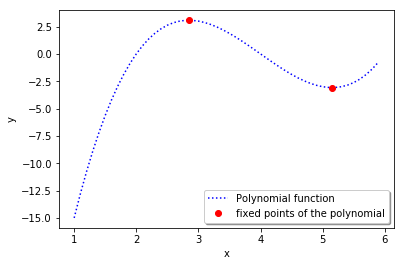

In [6]:
from sympy import symbols,solve,diff # import the library sympy for the symbolic math
import matplotlib.pyplot as plt # Import matplotlib.pyplot for ploting 
import numpy as np # Import numpy for generating an array of number

# Part 1

x, f = symbols('x f')
f = x**3-12*x**2+44*x-48

df = diff(f, x, 1) # differentiate once. If we put 2 instead of 1, it will differentiate twice
print("df/dx =", df)

# Part 2

# The x values at which the gradient becomes zero i.e. turning points
turns = solve(df,x) 
print('Solutions for df are:', turns)

# Part 3

def the_func(x):
    f = x**3-12*x**2+44*x-48
    return f

xd = np.arange(1, 6, 0.1) # Generate xd as an array of value from 1 to 6 by step of 0.1
fx = np.vectorize(the_func) # This allows you to pass an array of numbers 
                            # as inputs and get an array of data as outputs

y = fx(xd) # Pass the array xd to vector function fx to obtain a vector of output values in y
fpoints = fx(turns) # Pass the roots to obtain y values where the gradient becomes zero

fig, ax = plt.subplots() # To plot different things on the same figure.
# Note: 'fig' is the figure handle
# Note: 'ax' is the axes handle

ax.plot(xd, y, 'b:', label="Polynomial function") # Plot the curve related to f.
ax.plot(turns, fpoints, 'or', label="fixed points of the polynomial") # Plot the point where the derivative of f is 0.

ax.set_xlabel("x") # Define the x label
ax.set_ylabel("y") # Define the y label
legend = ax.legend(loc='lower right', shadow=True) # Show the legend
plt.show() # Show the figure

# Numpy module and linear algebra

# Q1
1. Use the Python numpy module to generate a random integer matrix of 3 by 3 with values between 0 and 10. 
2. Write functions to obtain the determinant, inverse, and eigen values of the matrix.
3. Given, $A$ is a matrix, $A^{-1}$ is the invserse of $A$, and $I$ is the identity matrix, use the calculator to show that $A A^{-1} = I$ if determinant of $A$ is not zero.
4. Write a functon to obtain the product of eigen values of the matrix $A$. Hence, note the relationship between the determinant and the product of Eigen values of a matrix.  

In [10]:
import numpy as np
from numpy import linalg as la

# Part 1

A = np.random.randint(10, size=[3,3])
print('The random integer matrix is:', A)

# Part 2

def get_inv(A):
    det_A = la.det(A)
    inv_A = None
    if det_A == 0:
        print('Determinant is zero. Inverse cannot be computed.')
    else:
        inv_A = la.inv(A)
        print('The inverse of A is:', inv_A)
    return inv_A

def get_det(A):
    det_A = la.det(A)
    print('The determinant of A is:', det_A)
    return det_A

def get_eigens(A):
    e_vals, e_vecs = la.eig(A)
    print('The Eigen vectors of A are:', e_vecs)
    print('The Eigen values of A are:', e_vals)
    return e_vals, e_vecs

key = input("What operation do you want to do? For inverse enter 'inv', for determinant enter 'det', for Eigenvalues enter 'eig'.")

if key == 'inv':
    inv_A = get_inv(A)
    
elif key == 'det':
    det_A = get_det(A)
    
elif key == 'eig':
    e_vals, e_vecs = get_eigens(A)

# Part 3

inv_A = get_inv(A)
AAinv = np.dot(A, inv_A)
print('A * inverse-A is:', AAinv)

# Part 4

e_vals, e_vecs = get_eigens(A)
e_vec_prods = np.prod(e_vecs)
print('Product of Eigen values:', e_vec_prods)

The random integer matrix is: [[0 1 9]
 [3 2 7]
 [0 6 1]]
What operation do you want to do? For inverse enter 'inv', for determinant enter 'det', for Eigenvalues enter 'eig'.det
The determinant of A is: 159.0
The inverse of A is: [[-0.25157233  0.33333333 -0.06918239]
 [-0.01886792  0.          0.16981132]
 [ 0.11320755  0.         -0.01886792]]
A * inverse-A is: [[1.00000000e+00 0.00000000e+00 2.77555756e-17]
 [9.71445147e-17 1.00000000e+00 0.00000000e+00]
 [1.38777878e-17 0.00000000e+00 1.00000000e+00]]
The Eigen vectors of A are: [[-0.54178832+0.j         -0.84190497+0.j         -0.84190497-0.j        ]
 [-0.68357119+0.j         -0.09513977+0.32919783j -0.09513977-0.32919783j]
 [-0.48907653+0.j          0.30926326-0.2795165j   0.30926326+0.2795165j ]]
The Eigen values of A are: [ 9.38606415+0.j         -3.19303208+2.59702791j -3.19303208-2.59702791j]
Product of Eigen values: (-0.0026197004132215394+0j)


# Q2

- Write some code to generate 10 lists, each of length 6, by randomly choosing characters and numbers in `[A, B, C, 1, 2, 3]`. 

- You can use the same character or number more than once in one list. (Hint: try and save yourself time by using a for-loop to repeat a task __ times).

- Display the 10 lists using the `print()` function.

[Help] You can generate an integer random number between a and b (including a and b) using the following code:

```
import random as r

x = r.randint(a,b)
```

In [16]:
import random as r

options = ['A','B','C',1,2,3] # Initiate a list containing the characters and numbers

lists = [] # Start an empty list that can be later appended with randomly chosen lists
for i in range(10): # Run for 10 iterations
    
    sublist = [] # An empty list to be filled with randomly chosen values from the options
    
    for j in range(6): # Run for 6 iterations
        
        # We could generate a random number for the index of the list
        n = r.randint(0, len(options)-1)
        # and then index the list as: options[n]
        
        # But from the documentation we can see we can use random.choice() 
        # See here: https://docs.python.org/3.7/library/random.html#random.choice
        
        rand_choice = r.choice(options)
        sublist.append(rand_choice)
    
    lists.append(sublist) # Append the filled d to lists
    print(sublist) # Check each list after filling 6 values

print(lists)

[3, 3, 'C', 'C', 2, 2]
[1, 'A', 'B', 2, 3, 3]
[3, 3, 3, 2, 'A', 1]
[3, 2, 1, 1, 'B', 'C']
['B', 'C', 2, 'C', 'B', 'C']
['C', 2, 1, 2, 3, 1]
[3, 2, 1, 3, 'B', 2]
[1, 2, 'A', 1, 'C', 'B']
[1, 3, 'C', 1, 2, 1]
['B', 2, 'B', 1, 3, 1]
[[3, 3, 'C', 'C', 2, 2], [1, 'A', 'B', 2, 3, 3], [3, 3, 3, 2, 'A', 1], [3, 2, 1, 1, 'B', 'C'], ['B', 'C', 2, 'C', 'B', 'C'], ['C', 2, 1, 2, 3, 1], [3, 2, 1, 3, 'B', 2], [1, 2, 'A', 1, 'C', 'B'], [1, 3, 'C', 1, 2, 1], ['B', 2, 'B', 1, 3, 1]]


 # Q3

Write Python code to generate numbers from 1 to 100 in steps of 2 and assign it to a variable called x. Hence generate values for y=sin⁡(x). Then plot y against x.

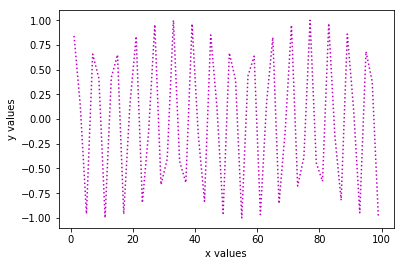

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 100, 2)
y = np.sin(x)

plt.plot(x, y, 'm:')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

# Some more problems to work on

# Q1
A complex number is given by $y=2.0+3.0j$

Write code that generates the message: “The real part of y is 2.00 and the imaginary part is 3.00”. 

Note that the message shows the number upto 2 decimal places.

In [18]:
y = 2.0 + 3.0j
print('The real part of y is {:.2f}'.format(y.real))
print('The imaginary part of y is {:.2f}'.format(y.imag))

The real part of y is 2.00
The imaginary part of y is 3.00


# Q2

Write a Python code to access random members of the list of tables – “study table”, “soldering table”, “kitchen table”, “wooden table”, and “plastic table”.

Display the output using “print” command that displays which table is selected for any random number below the total number of tables. For instance, if your random number is 0, it will display “Table 1 is a study table".

You can generate an integer random number between a and b using the following code:

```
import random as r

x = r.randint(a,b)
```

*Hint: you can always check the documentation of the 'random' module to see if there are some useful functions*

In [20]:
import random as r
tables = ['study table','soldering table','kitchen table','wooden table','plastic table']

for i in range(10):
    n = r.randint(0, len(tables)-1)
    print('This is a', tables[n])

This is a plastic table
This is a kitchen table
This is a soldering table
This is a wooden table
This is a kitchen table
This is a study table
This is a wooden table
This is a kitchen table
This is a wooden table
This is a kitchen table


In [22]:
import random
tables = ['study table','soldering table','kitchen table','wooden table','plastic table']

for i in range(10):
    table = random.choice(tables)
    print('This is a', table)

This is a study table
This is a plastic table
This is a kitchen table
This is a plastic table
This is a kitchen table
This is a plastic table
This is a kitchen table
This is a study table
This is a kitchen table
This is a kitchen table


# Q3

- Generate an array of values for angle variable $\theta$ between 0 and 2$\pi$.
- Write a function called “coordinates” that takes the $\theta$ array and gives out arrays for x, y
coordinates of points given by $x = \sin\theta$, $y = \cos\theta$.
- Hence plot y against x

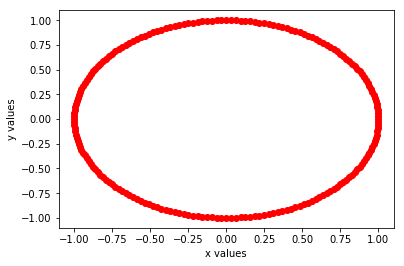

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def coordinates(theta):
    # As you can see we can pass in an array of values and numpy understands 
    # you want to apply the sin function to each of the elements of the array.
    x = np.sin(theta) 
    y = np.cos(theta)
    return x, y
    
thetas = np.arange(0,2*np.pi,np.pi/100)
x, y = coordinates(thetas)

plt.plot(x, y, 'or')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

# Q4

Compute the distance it takes to stop a car.

A car moves at $v_{0}$[m/sec] when the driver suddenly puts on the brake. Write some code to obtain inputs from the user to compute the minimum distance to the vehicle in front to avoid a collision. Your code should ask the user to input the values for following variables:

* The initial speed of the car $v_{0}$[m/sec] 
* The static friction coefficient $\mu$ which should be between 0 and 1

You can assume the following:

* The constant friction force is $\mu Mg$, where $0 < \mu < 1$ (assume static friction for simplicity. In fact a Coulomb friction should be used on moving objects.)
* The acceleration under gravity is g = 9.81 [m/sec^2]
* Then the distance $d$ traveled before coming to a complete halt is given by $d = 0.5 \frac{v_{0}^{2}}{\mu g}$

Derivation:
For the car to come to a complete stop, the initial kinetic energy should be dissipated in friction.

The kinetic energy = $\frac{1}{2}M v^{2}_{0}$, where $M$ is the mass of the car.
The total energy dissipated in friction is the work done against friction, which is friction force ($\mu M g$) * distance slipped ($d$) = $\mu M g d $

Since $\frac{1}{2}M v^{2}_{0} = \mu M g d $, $d = \frac{1}{2} \frac{v_{0}^{2}}{\mu g}$


In [1]:
import math

v0 = float(input("Please enter the initial speed of the car in meters per second: "))
mu = float(input("Please enter the friction coefficent between 0 and 1: "))

g = 9.81
d = 0.5 * v0**2/(mu*g)
print("The car will move {:.2f} [m] distance before stopping".format(d))

Please enter the initial speed of the car in meters per second: 10
Please enter the friction coefficent between 0 and 1: 0.5
The car will move 10.19 [m] distance before stopping


# Q5

Write a game that asks the user to guess a randomly generated integer in the range [1, 30] inclusive.

The player has 4 attempts to guess it. After each guess, the game must answer if it was too high or too low, and how many attempts the player has left.

E.g.:
I am thinking of a number between 1 and 30. You have 4 attempts to guess it!

Guess my number: 15

Too low...

You have 3 attempts left

Guess my number: 22

Too low...

You have 2 attempts left

Guess my number: 26

Too high...

You have 1 attempt left

Guess my number: 24

You win!

In [0]:
import random as r

min_number = 1
max_number = 30
attempts_left = 4
player_won = False # Boolean variable

my_number = r.randint(min_number, max_number) # This generates a integer random number between min_number and max_number

print("I am thinking of a number between", min_number, "and", max_number)
print("You have", attempts_left, "attempts to guess it!")

while attempts_left > 0  and not player_won: # when player-won is False, "not player_won" is True
    # When attempts_left > 0 is True, then "True and True" is True. Then the while loop can continue.
    guess_number = int(input("Guess my number: "))
    if guess_number == my_number: # player guessed right
        print("You win!")
        player_won = True
    else: # player guessed wrong, give hint!          
        if guess_number > my_number:
            print("Too high...")
        else:
            print("Too low...")
        attempts_left = attempts_left - 1
        print("You have", attempts_left,"attempts left")
        
if not player_won:
    print("Sorry, you lost! My number was", my_number)

## Inverted pendulum control, step-3: 
### Dynamic equations of the inverted pendulum in matrix form

We recall the dynamic equations of the inverted pendulum given by:
$$\ddot{x} = -\frac{(I + m l^2) \mu}{d} \dot{x} + \frac{(m l)^2 g}{d} \theta + \frac{(I+m l^2)}{d} F$$

where, $g = 9.81$ [m/sec$^2$] is the acceleration of gravity, $d = I (M+m) + M m l^2$.

$$ \ddot{\theta} = -\frac{m l \mu}{d} \dot{x} + \frac{(M+m) m g l}{d} \theta + \frac{m l}{d} F$$

We can re-arrange the dynamic equations in tutorial-2 to a matrix form given by:
$$\dot{\mathbf{s}} = \mathbf{A} \mathbf{s} + \mathbf{B}F$$

where,

\begin{equation}
\mathbf{s} = \left[ \begin{matrix}
x \\
\dot{x} \\
\theta \\
\dot{\theta} \\
\end{matrix} \right]
\end{equation}

\begin{equation}
\dot{\mathbf{s}} = \left[ \begin{matrix}
\dot{x} \\
\ddot{x} \\
\dot{\theta} \\
\ddot{\theta} \\
\end{matrix} \right]
\end{equation}

\begin{equation}
\mathbf{A} = \left[ \begin{matrix}
0 & 1 & 0 & 0 \\
0 & -\frac{(I + m l^2) \mu}{d} & \frac{(m l)^2 g}{d} & 0 \\
0 & 0 & 0 & 1 \\
0 & -\frac{m l \mu}{d} & \frac{(M+m) m g l}{d} & 0 \\
\end{matrix} \right]
\end{equation}

\begin{equation}
\mathbf{B} = \left[ \begin{matrix}
0\\
\frac{(I+m l^2)}{d}\\
0\\
\frac{m l}{d}\\
\end{matrix} \right]
\end{equation}

Use arrays in the Numpy module to write a function to obtain matrices $\mathbf{A}$ and $\mathbf{B}$, given $m = 0.1$ [kg], $M = 1$ [kg], $l = 1$ [m], $I = 0.5 m l^2$ [kg m$^2$], $\mu = 0.3$, and $g = 9.81$ [m/sec$^2$].

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def pendulum_mat():
    m = 0.1        # Mass of the pendulum
    M = 1          # Mass of the cart
    l = 1          # Length of the pendulum
    I = 0.5*m*l**2 # Moment of inertia of the pendulum
    beta = 0.3     # Friction of the cart
    g = 9.81       # Acceleration of gravity
    
    den = I*(M+m) + M*m*l**2;
    
    A = np.array([[0, 1, 0, 0],[0, -(I + m*l**2)*beta/den, ((m*l)**2)*g/den, 0],[0,0,0,1],[0,-m*l*beta/den,(M+m)*m*g*l/den,0]]);
    B = np.array([0,(I+m*l**2)/den,0,m*l/den]);
    return A, B

A, B = pendulum_mat() # Call the function to obtain A and B matrices
print('A:', A)
print("Shape of A:", A.shape)
print('B:', B)
print("Shape of B:", B.shape)

A: [[ 0.          1.          0.          0.        ]
 [ 0.         -0.29032258  0.63290323  0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.         -0.19354839  6.96193548  0.        ]]
Shape of A: (4, 4)
B: [0.         0.96774194 0.         0.64516129]
Shape of B: (4,)


## Inverted pendulum control, step-4:
### Integration to obtain the states in the next sampling step

In matrix form, we can integrate $\dot{\mathbf{s}}$ to obtain $\mathbf{s}$ as follows:
$$\dot{\mathbf{s}} = \frac{\mathbf{s}_{t+T} - \mathbf{s}_t}{T} $$, where $\mathbf{s}_{t+T}$ is $\mathbf{s}$ at time $t+T$ and $\mathbf{s}_t$ is $\mathbf{s}$ at time $t$, and $T$ is the sampling step.

\begin{equation}
\dot{\mathbf{s}} = \mathbf{A} \mathbf{s} + \mathbf{B}F 
\end{equation}

\begin{equation}
\frac{\mathbf{s}_{t+T} - \mathbf{s}_t}{T} = \mathbf{A} \mathbf{s}_t + \mathbf{B}F_t 
\end{equation}

\begin{equation}
\mathbf{s}_{t+T} = \left[ \mathbf{I} + T \mathbf{A} \right] \mathbf{s}_t  + T \mathbf{B}F_t 
\end{equation}

where, $\mathbf{I}$ is a $4 \times 4$ identity matrix.

Write a function that takes matrices $\mathbf{A}$, $\mathbf{B}$, $\mathbf{s}_t$, and $F_t$ as arguments and returns $\mathbf{s}_{t+T}$

In [4]:
def pendulum_dynamic(state, A, B, force):
    #I = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    I = np.eye(4);
    T = 0.002; #Sampling step

    Ab = np.array(I+T*A);
    state = np.dot(Ab,state) + T*np.dot(B,force);
    state = np.array(state);
    return state

state = np.array([0,0,0.1,0]); # Initial states - cart position, cart velocity, pendulum angle, pendulum angula
force = 3

print('state at time t:', state)
state = pendulum_dynamic(state, A, B, force); # Obtain the next value of the state vector
print('state at time t+T:', state)

state at time t: [0.  0.  0.1 0. ]
state at time t+T: [0.         0.00593303 0.1        0.00526335]
